In [271]:
import numpy as np
import matplotlib.pyplot as plt
import random

# AHL Parameters
D = 0.01  # Diffusion coefficient
k = 0.01  # Chemotaxis coefficient
dt = 0.1  # Time step
T = 1.0  # Total simulation time
N = 100  # Number of grid points in each dimension
h = 10 / N  # Grid spacing
decay = 0.01  # Decay rate

# Cell Parameters
I = 0.1  # lateral inhibition factor
E = 0.1  # AHL enhancement factor
B = 0.01 # background signal


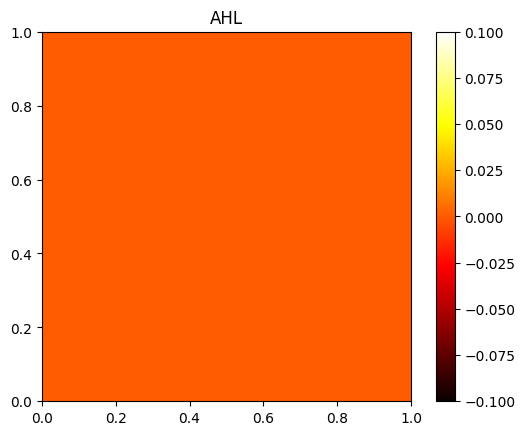

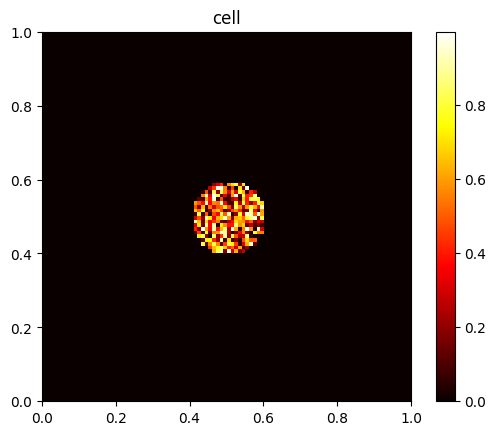

In [153]:
# test the initiation
plot_img(u,"AHL")
plot_img(v,"cell")

In [2]:
# plot data
def plot_img(data, title):
    plt.imshow(data, cmap='hot', extent=[0, 1, 0, 1])
    plt.colorbar()
    plt.title(title)
    plt.show()

In [46]:
# cell growth
def grow(c,v):
    N = len(c)
    new_c = c.copy()
    new_v = v.copy()
    for i in range(1,N-1):
        for j in range(1,N-1):
            if c[i,j] == 0:
                new_v[i,j] = 0
                neighbors= [c[i-1,j], c[i,j-1], c[i+1,j], c[i,j+1], c[i-1,j-1], c[i+1,j+1], c[i-1,j+1], c[i+1,j-1]]
                neighbors_signal = [v[i-1,j], v[i,j-1], v[i+1,j], v[i,j+1], v[i-1,j-1], v[i+1,j+1], v[i-1,j+1], v[i+1,j-1]]
                if (sum(neighbors_signal) > 0) and (random.random() < 0.25 * sum(neighbors)):
                    new_v[i,j] = np.random.choice(neighbors_signal)
                    new_c[i,j]=1
    return new_c, new_v
    

In [4]:
# initiate boundary
def bound(v):
    N=len(v)
    v[0,:]=0
    v[:,N-1]=0
    v[:,0]=0
    v[N-1,:]=0
    return v

In [146]:
# laplacian
def laplacian(data, D, h, dt):
    lapl = np.roll(data, 1, axis=0) + np.roll(data, -1, axis=0) + np.roll(data, 1, axis=1) + np.roll(data, -1, axis=1) - 4 * data
    lapl /= h**2
    data += D * lapl * dt
    return data

In [277]:
# lateral inhibition
def lateral(data, AHL):
    new_data=data.copy()
    for i in range(1,len(data)-1):
        for j in range(1,len(data[0])-1):
            neighbors = [data[i-1,j], data[i+1,j], data[i,j-1], data[i,j+1], data[i-1,j-1], data[i-1,j+1], data[i+1,j-1], data[i+1,j+1]]
            new_data[i, j] = I * data[i, j] / (sum(neighbors)*AHL[i,j]+I)
            if new_data[i,j]<0.1:
                new_data[i,j]=0
    return new_data

In [242]:
# gain background signal
def background(u, c, B):
    for i in range(1, N-1):
        for j in range(1, N-1):
            if c[i,j] != 0:
                if u[i,j] == 0:
                    u[i,j] = B * random.random()
    return u

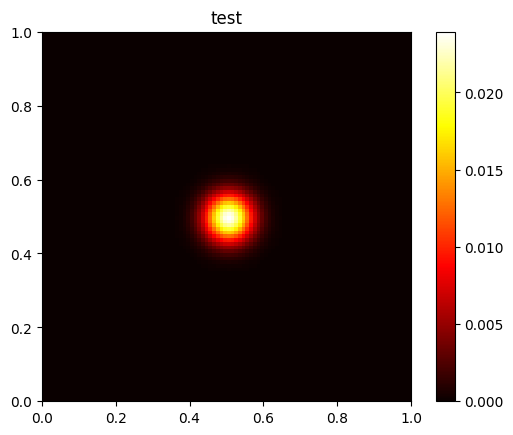

In [113]:
# test
u = np.zeros((N, N))
u[50,50]=3
u=laplacian(u,D,h,dt,100)
plot_img(u, "test")

In [280]:
# Initialize the grid
x = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, x)
u = np.zeros((N, N))  # AHL concentration
v = np.zeros((N, N))  # Cell signal
c = np.zeros((N, N))  # Cells

cell = np.zeros((N, N))  # Cells position
CdiA = np.zeros((N, N))  # CdiA expression
LuxR = np.zeros((N, N))  # LuxR received by each cell
AHL = np.zeros((N, N))  # AHL concentration
LA = LuxR * AHL  # LuxR*AHL
CI =  np.zeros((N, N))  # CI expression
GFP =  np.zeros((N, N))  # GFP expression


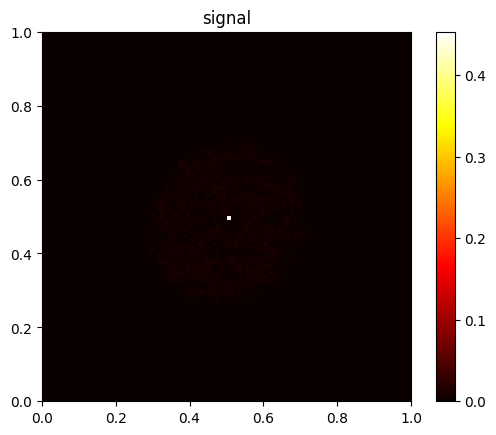

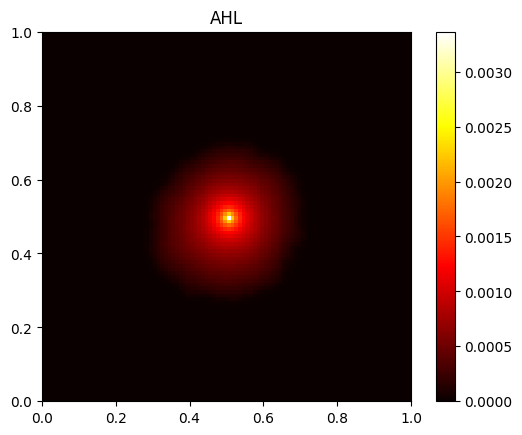

In [285]:
# Simulation loop
for step in range(20):
    
    # cell grow and gain background expression
    c,v = grow(c,v)
    v = background(v,c,B)

    # AHL diffusion and cell secretion
    for t in np.arange(0, T, dt):
        v=bound(v)
        u=bound(u)
        # AHL diffusion and cell secretion
        u=laplacian(u,D,h,dt)
        u -= dt * decay * u
        u += dt * k * v

        # cell lateral inhibition
        v = lateral(v,u)
        v = background(v,c,B)

#plot_img(c, 'cell')
plot_img(v, 'signal')
plot_img(u, 'AHL')